In [20]:
#Importation des modules nécesaaires au notebook
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics
import matplotlib.pyplot as plt
import pandas as pd

In [104]:
#Importation et affichage de la base du DataFrame
dfjointe = pd.read_csv('Bases de données/donnéesjointes.csv')
dfjointe

In [62]:
#Création d'un DataFrame pour la modélisation

#Sélection des colonnes d'intérêt
dfmodel = pd.DataFrame()
dfmodel = dfjointe[['Prix (€)', 'Taille', 'Etat', 'Vues', '%popvot', 'Niveau de vie commune']]

#Petit nettoyage
dfmodel = dfmodel.dropna()
dfmodel['Niveau de vie commune'] = dfmodel['Niveau de vie commune'].apply(lambda x: x.replace(' ',''))
dfmodel['Niveau de vie commune'] = pd.to_numeric(dfmodel['Niveau de vie commune'])
dfmodel['Vues'] = pd.to_numeric(dfmodel['Vues'])

#Transformation des variables catégorielles (jean de base est en taille 'S' et en 'bon état')
dummiesEtat = pd.get_dummies(dfmodel['Etat'], drop_first=True, dtype=int)
dummiesTaille = pd.get_dummies(dfmodel['Taille'], drop_first=False, dtype=int)
dummiesTaille.drop('S', axis=1, inplace=True)

#Concaténation des DataFrames de dummies
dfmodel.drop(['Taille', 'Etat'], axis=1, inplace=True)
dfmodeldummies = pd.concat([dfmodel, dummiesTaille, dummiesEtat], axis=1)

In [120]:
#Préparation d'une première régression linéaire

#Séparation en données d'entraînement et de test
X_train, X_test, Y_train, Y_test = train_test_split(dfmodeldummies[['Vues', '%popvot', 'Niveau de vie commune',
                                                                    'L', 'M', '5XL',
                                                                    'W23 | FR 32',
                                                                    'W24 | FR 34',
                                                                    'W25 | FR 34',
                                                                    'W26 | FR 36',
                                                                    'W27 | FR 36',
                                                                    'W28 | FR 38',
                                                                    'W29 | FR 38',
                                                                    'W30 | FR 40',
                                                                    'W31 | FR 40',
                                                                    'W32 | FR 42',
                                                                    'W33 | FR 42',
                                                                    'W34 | FR 44',
                                                                    'W36 | FR 46',
                                                                    'W38 | FR 48',
                                                                    'W40 | FR 50',
                                                                    'W48 | FR 58',
                                                                    'XL',
                                                                    'XXS / 32 / 4',
                                                                    'Neuf avec étiquette',
                                                                    'Neuf sans étiquette',
                                                                    'Satisfaisant',
                                                                    'Très bon état'
                                                                   ]],
                                                    dfmodeldummies['Prix (€)'],
                                                    train_size=0.7,
                                                    random_state=7
                                                   )

In [121]:
#Standardisation et normalisation en norme l2 des données d'entraînement et de test
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

normalizer = preprocessing.Normalizer()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

In [122]:
#Calcul de la première régression linéaire
reg = LinearRegression()
reg.fit(X_train, Y_train)

LinearRegression()

In [123]:
#calcul de son R²
reg.score(X_test, Y_test)

0.2583905057439405

<Axes: title={'center': 'Coefficients de la première régression linéaire'}>

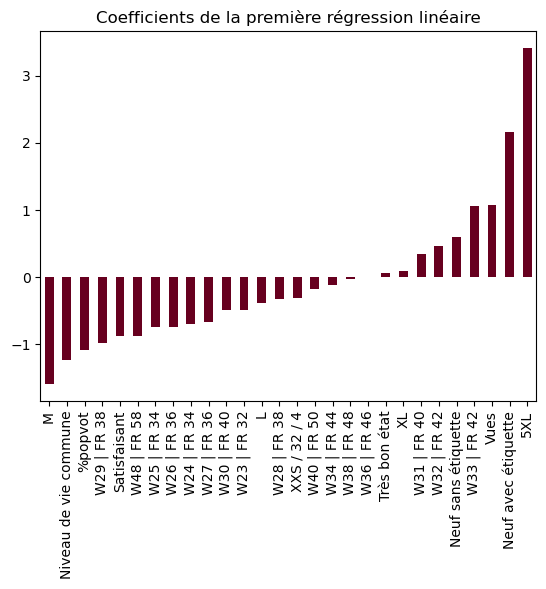

In [124]:
#Visualisation des coefficients des variables explicatives
coeffs = pd.DataFrame(index=dfmodeldummies.drop('Prix (€)', axis=1).columns)
coeffs['Coefficients']=reg.coef_
coeffs.sort_values('Coefficients').sort_values('Coefficients').plot(kind='bar',
                                         colormap='RdBu',
                                        fontsize=10,
                                        title='Coefficients de la première régression linéaire',
                                        legend=False)

In [125]:
#Préparation d'une deuxième regression linéaire sur moins de variables explicatives

#Séparation des données en données d'entraînement et de test
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(dfmodeldummies[['Vues', '%popvot', 'Niveau de vie commune',
                                                                    'Neuf avec étiquette',
                                                                    'Neuf sans étiquette',
                                                                    'Satisfaisant',
                                                                    'Très bon état'
                                                                   ]],
                                                    dfmodeldummies['Prix (€)'],
                                                    train_size=0.8,
                                                        random_state=7
                                                   )

In [126]:
#Standardisation et normilisation en norme l2 des données d'entraînement et de test
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)

X_train2 = normalizer.fit_transform(X_train2)
X_test2 = normalizer.transform(X_test2)

In [127]:
#Calcul de la deuxième régression linéaire
reg2 = LinearRegression()
reg2.fit(X_train2, Y_train2)

LinearRegression()

In [128]:
#Calcul de son R²
reg2.score(X_test2, Y_test2)

0.1623631909557156

<Axes: title={'center': 'Coefficients de la déuxième régression linéaire'}>

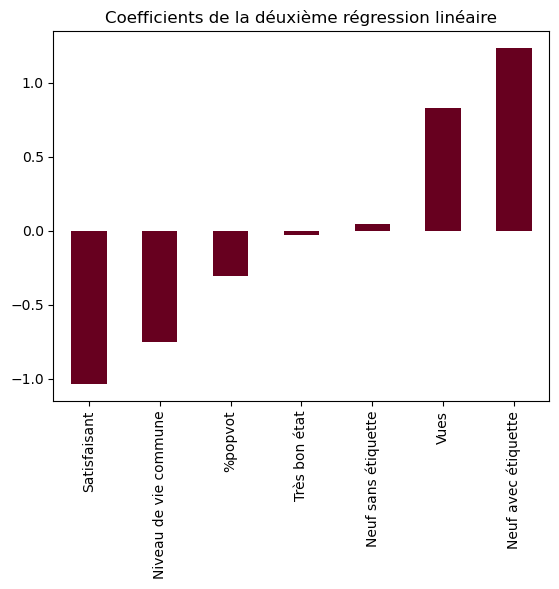

In [129]:
#Visualisation des coefficients des variables explicatives
coeffs2 = pd.DataFrame(index=dfmodeldummies.drop(['Prix (€)', 'L', 'M', '5XL',
                                                                    'W23 | FR 32',
                                                                    'W24 | FR 34',
                                                                    'W25 | FR 34',
                                                                    'W26 | FR 36',
                                                                    'W27 | FR 36',
                                                                    'W28 | FR 38',
                                                                    'W29 | FR 38',
                                                                    'W30 | FR 40',
                                                                    'W31 | FR 40',
                                                                    'W32 | FR 42',
                                                                    'W33 | FR 42',
                                                                    'W34 | FR 44',
                                                                    'W36 | FR 46',
                                                                    'W38 | FR 48',
                                                                    'W40 | FR 50',
                                                                    'W48 | FR 58',
                                                                    'XL',
                                                                    'XXS / 32 / 4'], axis=1).columns)
coeffs2['Coefficients']=reg2.coef_
coeffs2.sort_values('Coefficients').transpose()
coeffs2.sort_values('Coefficients').plot(kind='bar',
                                         colormap='RdBu',
                                        fontsize=10,
                                        title='Coefficients de la déuxième régression linéaire',
                                        legend=False)